2023-01-18 06:19:20.044209: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-18 06:19:20.044256: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2023-01-18 06:19:24.572788: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-18 06:19:24.572842: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-18 06:19:24.572888: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Tasus): /proc/driver/nvidia/version does not exist
2023-01-18 06:19:24.573984: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/7
1719/1719 [==============================] - 19s 11ms/step - loss: 0.1568 - accuracy: 0.9527 - val_loss: 0.0546 - val_accuracy: 0.9846
Epoch 2/7
1719/1719 [==============================] - 19s 11ms/step - loss: 0.0528 - accuracy: 0.9837 - val_loss: 0.0425 - val_accuracy: 0.9888
Epoch 3/7
1719/1719 [==============================] - 19s 11ms/step - loss: 0.0365 - accuracy: 0.9887 - val_loss: 0.0359 - val_accuracy: 0.9894
Epoch 4/7
1719/1719 [==============================] - 18s 10ms/step - loss: 0.0267 - accuracy: 0.9913 - val_loss: 0.0347 - val_accuracy: 0.9894
Epoch 5/7
1719/1719 [==============================] - 18s 11ms/step - loss: 0.0198 - accuracy: 0.9940 - val_loss: 0.0402 - val_accuracy: 0.9888
Epoch 6/7
1719/1719 [==============================] - 18s 10ms/step - loss: 0.0162 - accuracy: 0.9945 - val_loss: 0.0366 - val_accuracy: 0.9898
Epoch 7/7
1719/1719 [==============================] - 18s 10ms/step - loss: 0.0126 - accuracy: 0.9954 - val_loss: 0.0317 - val_ac

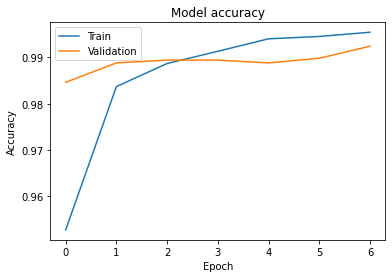

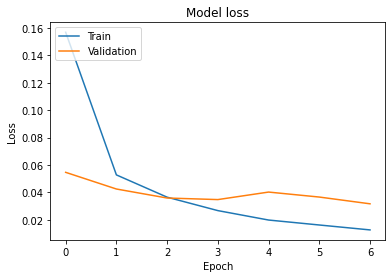

2023-01-18 06:21:33.070595: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model.pb/assets
Test accuracy: 0.9905999898910522


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

x_val = x_train[:5000]
y_val = y_train[:5000]
x_train = x_train[5000:]
y_train = y_train[5000:]

# Define the model
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
checkpoint = ModelCheckpoint('model.h5', save_best_only=True, save_weights_only=False, mode='auto', period=1)


# Train the model
history = model.fit(x_train, y_train, epochs=7, validation_data=(x_val, y_val), callbacks=[checkpoint])

# Plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Save the model in protobuf format
tf.saved_model.save(model, 'model.pb')

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:',test_acc)


In [2]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 4ms/step - loss: 0.0314 - accuracy: 0.9906
Test accuracy: 0.9905999898910522


In [3]:
import gradio as gr
import tensorflow as tf

model = tf.keras.models.load_model("model.h5")

def sketch_recognition(img):
    img = img.reshape(1, 28, 28, 1).astype('float32') / 255
    prediction = model.predict(img)
    return int(tf.argmax(prediction, 1))

gr.Interface(fn=sketch_recognition, inputs="sketchpad", outputs="label").launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
